In [3]:
import os
import torch
import sys
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.transforms import functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.io import read_image
import time
import json
from tqdm import tqdm
from torch.utils.data import random_split
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.models.resnet import ResNet50_Weights
import shutil
from sklearn.model_selection import train_test_split
from ups_utils import train_initial, train_regular, pseudo_labeling

In [6]:
folders = [
    r'C:\Users\janny\Aalto_project_2\models\MDM_IaA_ups_01_dataset_01_labeled_20240410-213130',
    r'C:\Users\janny\Aalto_project_2\models\MDM_IaA_ups_01_dataset_01_labeled_uncertainty_20240411-113942',
    r'C:\Users\janny\Aalto_project_2\models\MDM_IaA_ups_01_dataset_02_labeled_20240410-164531',
    r'C:\Users\janny\Aalto_project_2\models\MDM_IaA_ups_01_dataset_02_labeled_uncertainty_20240411-171549',
    r'C:\Users\janny\Aalto_project_2\models\MDM_IaA_ups_01_dataset_05_labeled_20240410-130157',
    r'C:\Users\janny\Aalto_project_2\models\MDM_IaA_ups_01_dataset_05_labeled_uncertainty_20240411-213200',
]

In [10]:
def plot_iou_for_folders(folders):
    for folder in folders:
        plt.figure(figsize=(10, 6))
        for itr in range(5):  # for itr_0 to itr_4
            itr_folder = os.path.join(folder, f'itr_{itr}')
            metrics_file = os.path.join(itr_folder, 'val_metrics.json')
            
            if os.path.exists(metrics_file):
                with open(metrics_file, 'r') as file:
                    data = json.load(file)
                    iou_values = [entry['iou'] for entry in data if 'iou' in entry]
                    epochs = list(range(1, len(iou_values) + 1))
                    
                    plt.plot(epochs, iou_values, label=f'Iteration {itr}')
                    plt.xlim(1, 20)  # Limit x-axis to max 20 epochs
            else:
                print(f"No val_metrics.json found in {itr_folder}")
        
        plt.title(f'IoU over Epochs for {os.path.basename(folder)}')
        plt.xlabel('Epoch')
        plt.ylabel('IoU')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'../results/{os.path.basename(folder)}')
        plt.show()

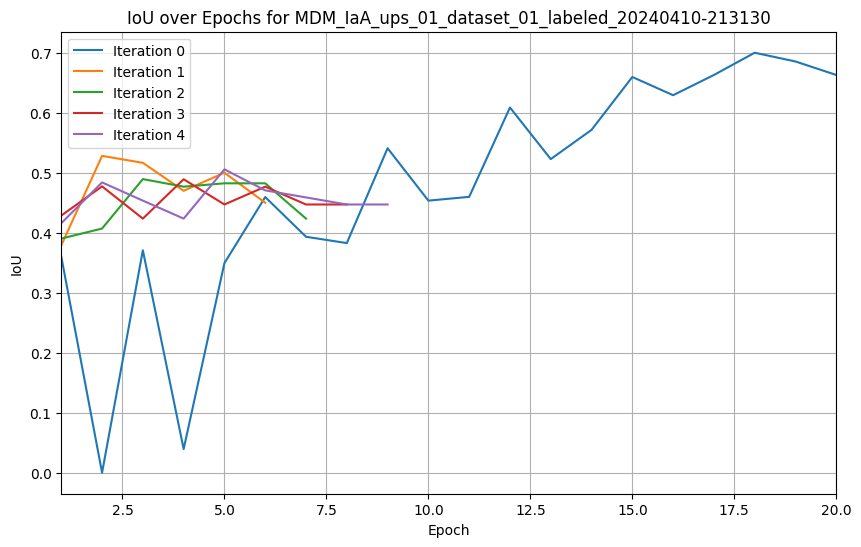

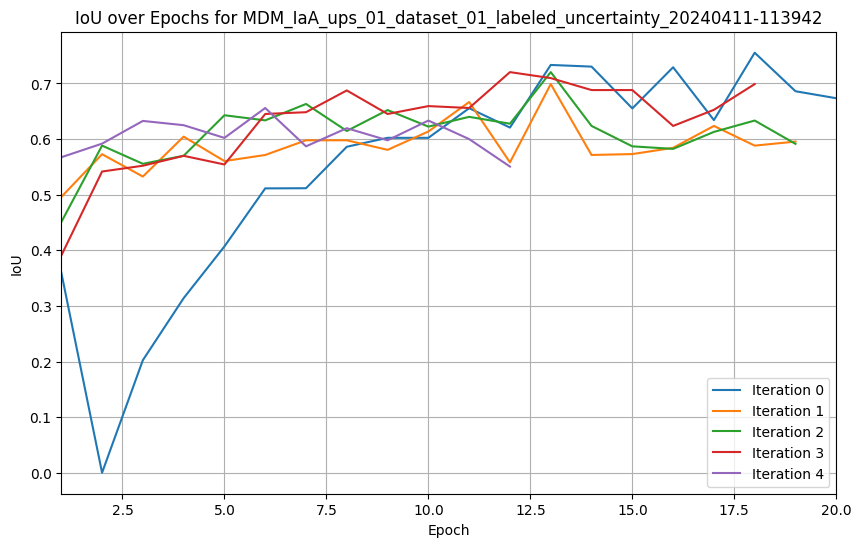

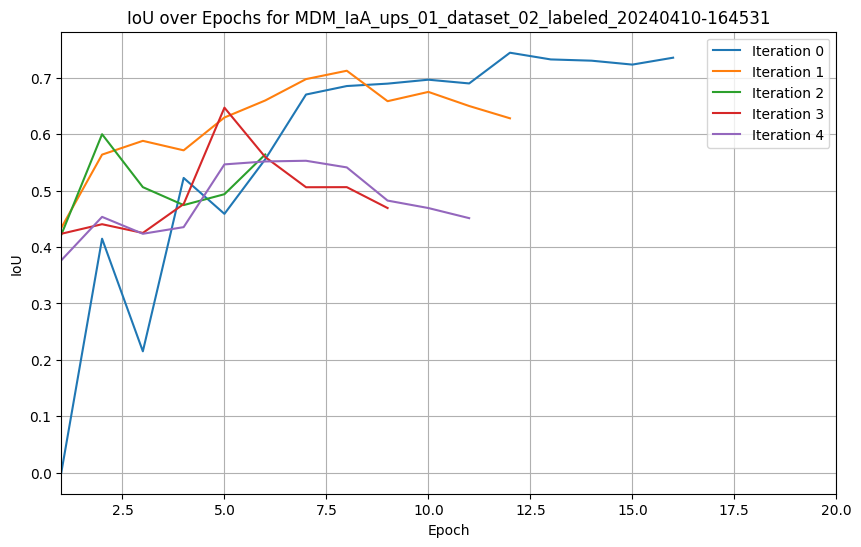

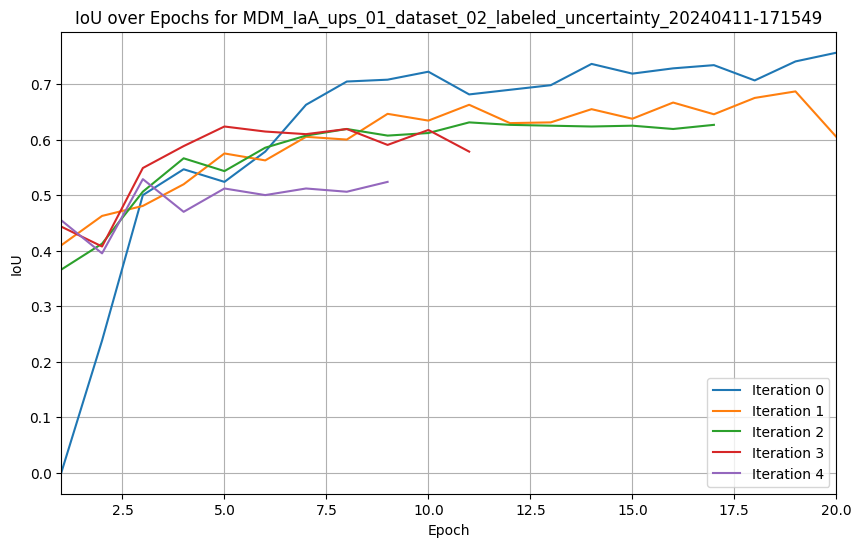

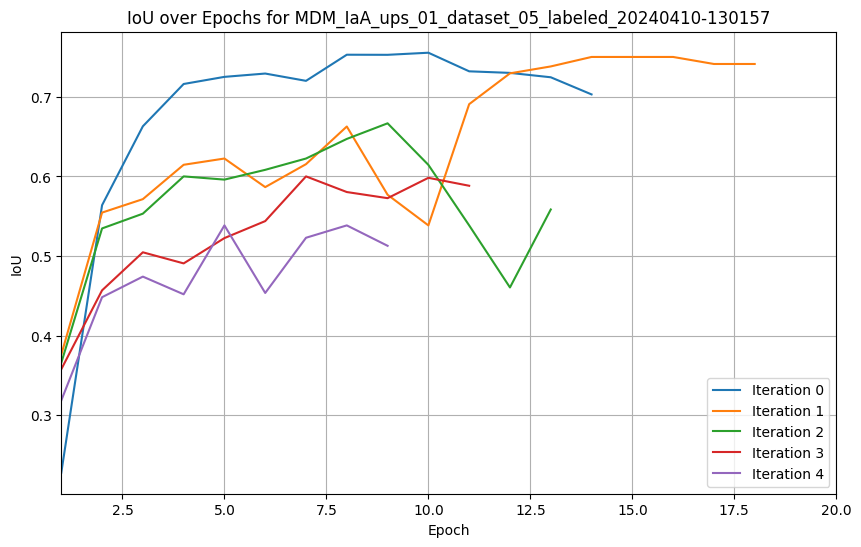

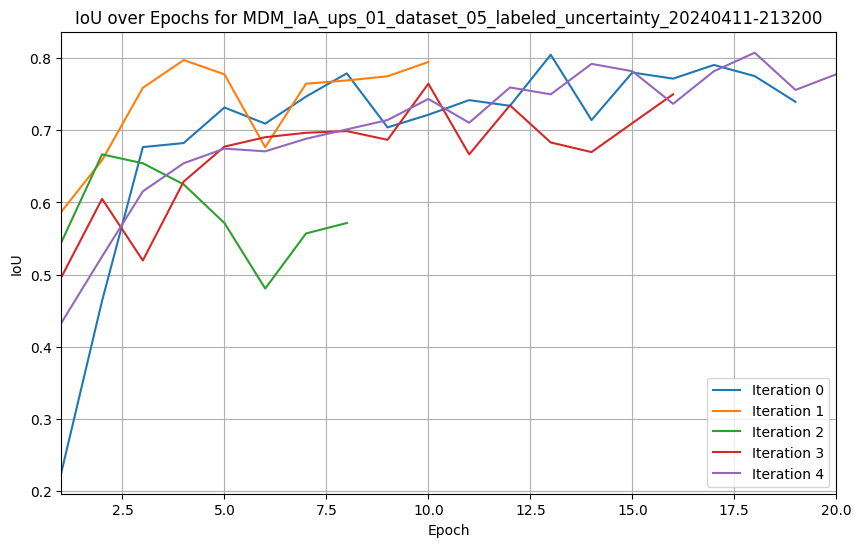

: 

In [11]:
plot_iou_for_folders(folders)